# <font color=blue> <center> Telecom Customer Churn Data </font> </center>
***

# <font color =blue> Business Understanding</font>

#### The data set we chose is entitled "Telecom_Customer Churn" and is available for download at  https://www.kaggle.com/abhinav89/telecom-customer/data. Although descriptive information regarding this data set is relatively sparse, additional information regarding this data set can be found at: http://m.library2.smu.ca/bitstream/handle/01/22018/yu_wei_masters_2005.PDF?sequence=1. 

#### As the title indicates, the focus of the data set is to explore and define what factors contribute to churn in the Telecom industry. "Churn" measures the number of consumers that have ended their customer relationship with a provider. Churn is measured in a binary form, simply indicating whether a consumer did or did not churn. Although telecommunication today is a broad term that encompasses everything from broadacast media to wide area networks, the businesses in this study specifically refer to cell service providers. 

#### With 100 attributes indicating everything from the demographics of each consumer to highly technical aspects of each customers call, we need to concentrate our analysis on what would generate the most impact in explaining churn. First we want to delve into the demographics of the data set to determine if the 100,000 records in this data set encompass a sufficiently random population to truly indicate causal inferences. We then want to investigate technical aspects of the data to determine what provider failures are more likely to create churn. The demographics may also indicated which subtypes of consumers are more inclined to be loyal and should not be the focus of marketing campaigns. 

#### Secondarily, we should look the bulk of the data which are technical statistics on each consumers cell usage experience to determine what failures in cell service lead to consumer attrition/ create churn. Some of these variables are intuitive and would easily reduce the customer satisfaction, such as the dropped calls variables which might lead to churn. In the telecom industry frequently uses factors like those listed in the dataset like dropped call counts, number of calls to the call center, and  number of overages on billing minutes and data to create a CSI compounded factore that helps monitor customers happiness with the service because churn is a very expensive problem from them.  This data set perfectly created to more concreately idententify churn risk factors.

#### Other benefits to the dataset include the amount of  in depth statistics and clarity of each subcomponent of the data. An example is that it is relatively easy to see if the call and data volumes are increasing or decreasing across time blocks.  There is probably also a billing overage variable or two in the set.  People who are trending down in usage are big candidates for churn because they are already tempering down their usage - whether it's already too late to save them or not is another matter of course.

#### In this study we intend to determine concrete variables that marketing and quality assurance teams should focus on to retain incoming revenue by seperating ourselves from logical assumptions about consumer wants and priorities in comparing the hard numbers as they are reported. This will help the major wireless firms, which are seemingly always embroiled in direct attack marketing campaigns with eachother, focus on which values truly impact their bottom line and what their focus should be in securing future revenue.

### The economic impact of a successful analysis is well over 180 billion dollars annually  as depicted by the graph below that just evaluates the four major key players from Market Realist, "http://marketrealist.com/2017/09/how-telecom-players-stack-up-after-2q17/ ."

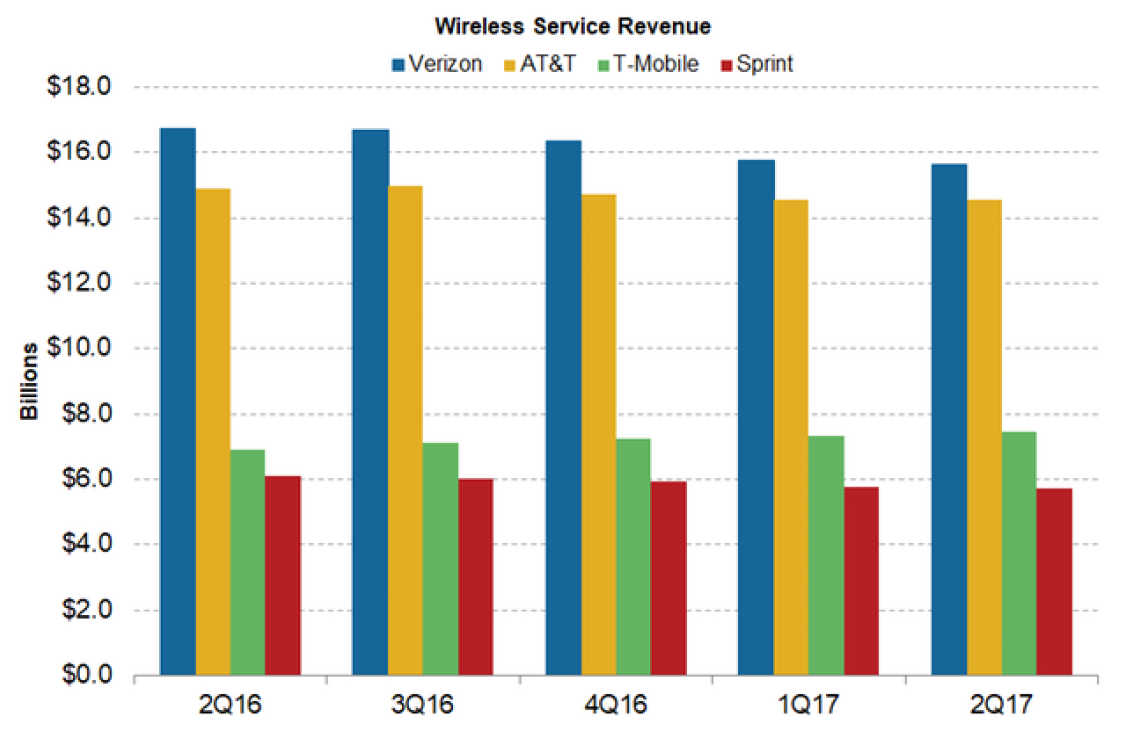

In [1]:
from IPython.core.display import Image
Image(filename=('wireless_graph.png'))

# <font color=blue>Data Meaning</font>

### From our original 100 variables, we trimmed the list down to a more workable and logical subset. This was done both through statistical analysis as well as business intelligence of the telecom sector. The full methodology we leveraged for dimensionality reduction to identify the most valueable attributes will be further defined in the <font color=blue>"Data Quality"</font> Section.  
### The attributes fall loosely into the categories of quality issues, billing rate issues, and behavioral indicators that may demonstrator either “stickiness” or a willingness to churn. For instance, the attribute custcare_mean below, shows an average monthly number of calls into the customer care center for complaint/resolution purposes and may be a strong indicator of dissatisfaction with the service being provided.  Other evidence of dissatisfaction can be found in the decrease of use over time, so a comparative (difference) of avg3mou to avg6mou may yield greater insight and predictive power than simple measurements of minutes of use.  Whereas the price of the handset and high minutes of might prove to be variable the indicate stickiness of the service. The list of attributes and descriptions we narrowed in on follows: 

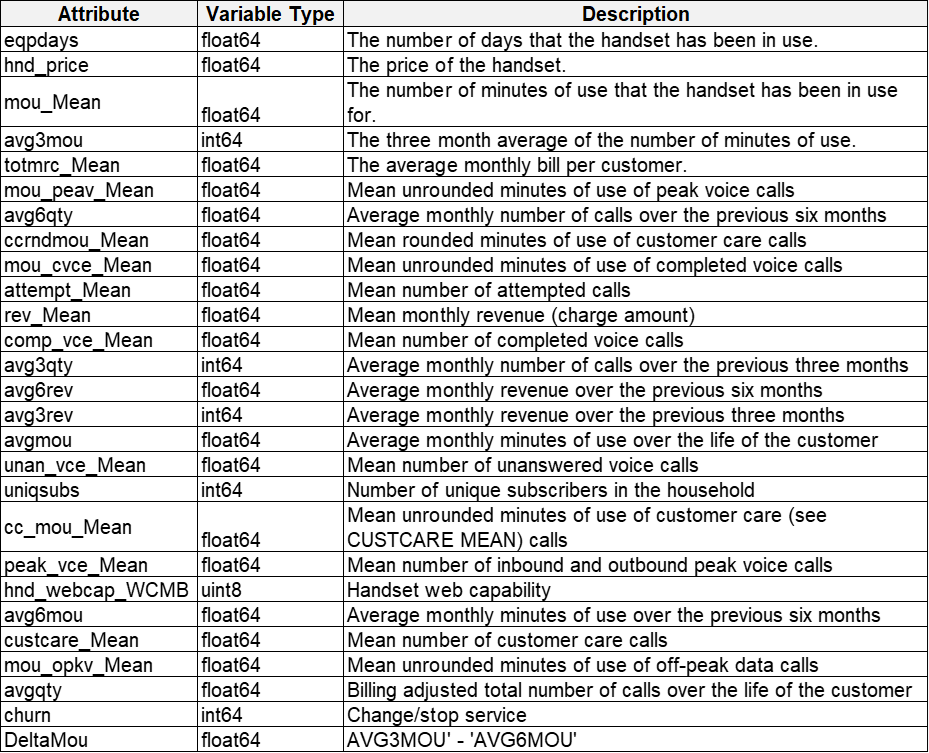

In [2]:
from IPython.core.display import Image
Image(filename=('Desc_Attribute.png'))


### The Top 5 variables we would like to focus on and why:
> #### Eqpdays  - the older the handset the more likely a person is coming up on the end of a contract period and looking for the next good deal to get a new handset which may not be with their current subscriber
> #### Custcare_mean (Mean number of customer care calls) – this is an important indicator of satisfaction as calls into customer care are both expensive to the carrier and usually mean the customer is unhappy with some aspect of their service.  This attribute is not made to top 25 important attribute list after the analysis. 
> #### hnd_price (price they paid for the handset) and totmrc_mean (reoccurring monthly bill) are important price sensitivity aspects.  A single high bill is not as likely to cause serious dissatisfaction, however a repeatedly high bill most certainly will and this attribute is a good indicator of frequent high bills and potentially a lot of overage charges.
> #### Totmou(Total minutes of use over the life of the customer) – stickiness of the service should be indicated by very high usage of the service;additionally we can theorize that high minutes of use also indicates good quality service since variables concerning dropped call frequency did not show to be very statistically significant. This attribute is not made to top 25 important attribute list. 
> #### Uniqsubs (number of subscribers in the household) is an important indicator of stickiness.  Plans that have more than one individual on them are less likely to see churn that a simple plan that is  for a single individual because a change in telecom carrier would have larger effects.
> #### Avg3mou – important indicator of usage levels and well populated in conjunction with our newly derived attribute mou_diff which will demonstrate increasing or decreasing usage that will be important as a demonstration of satisfaction.  Users that are beginning to lower their usage may be getting ready to churn. 


> ### <center> <font color=grey> Data Loading and Checking</font> </center>

In [3]:
# load the dataset and packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

df = pd.read_csv('Telecom_customer churn.csv') # read in the csv file

df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


#### Information regarding the full data set before reduced or transformed in the <font color=blue>Data Quality</font> Section

In [4]:
# Data Frame Size
df.shape

(100000, 100)

In [5]:
# Data Type

# print (df.dtypes)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
rev_Mean            99643 non-null float64
mou_Mean            99643 non-null float64
totmrc_Mean         99643 non-null float64
da_Mean             99643 non-null float64
ovrmou_Mean         99643 non-null float64
ovrrev_Mean         99643 non-null float64
vceovr_Mean         99643 non-null float64
datovr_Mean         99643 non-null float64
roam_Mean           99643 non-null float64
change_mou          99109 non-null float64
change_rev          99109 non-null float64
drop_vce_Mean       100000 non-null float64
drop_dat_Mean       100000 non-null float64
blck_vce_Mean       100000 non-null float64
blck_dat_Mean       100000 non-null float64
unan_vce_Mean       100000 non-null float64
unan_dat_Mean       100000 non-null float64
plcd_vce_Mean       100000 non-null float64
plcd_dat_Mean       100000 non-null float64
recv_vce_Mean       100000 non-null float64
recv_sms_Mean       

# <font color=blue>Data Quality</font>

This dataset include 100 attributes so dimension reduction is required to minimize the time to analyze. Attributes with excessive null values must be removed, rows with excessive missing data must be omitted, and the overall number of attributes must be reduced. 

### Data Quality issues will be resolved in 4 Steps:
### 1. Categorical Attributes are first seperated and plotted
### 2. Null Records are removed

### 3. Dimension Reduction to determine the most compelling attributes, <font color=blue>(Exceptional Work</font> Rubric Item)
>> #### Three Different Dimensionality Reduction methods are used to determine key attributes and then averaged together:
> #### 1. Univariate Chi-Square Test
> #### 2. Recursive Feature Elimination
> #### 3 .Feature Importance with Extra Trees

### 4. <font color= blue>New Features</font> are added

### Categorical Attributes Information
Procedure:
1. Separate out categorical(string data only)
2. Assign dummy or other reasonable numbers for each categorical attributes
3. Plotted to see the varying amounts of categorical levels

In [6]:
# data frame with only string data
df_obj = df.loc[:, df.dtypes == object]
col_list_obj = list(df_obj)

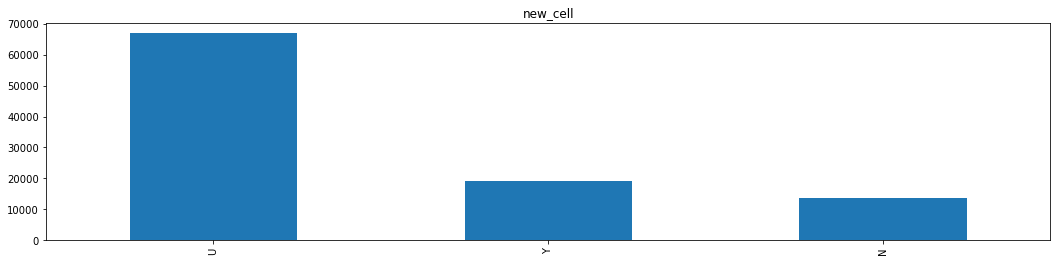

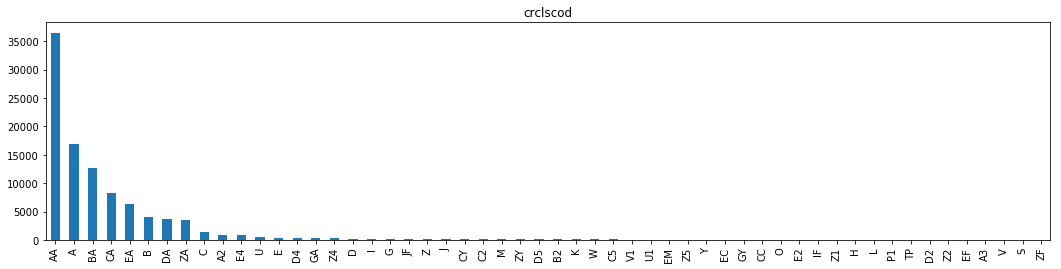

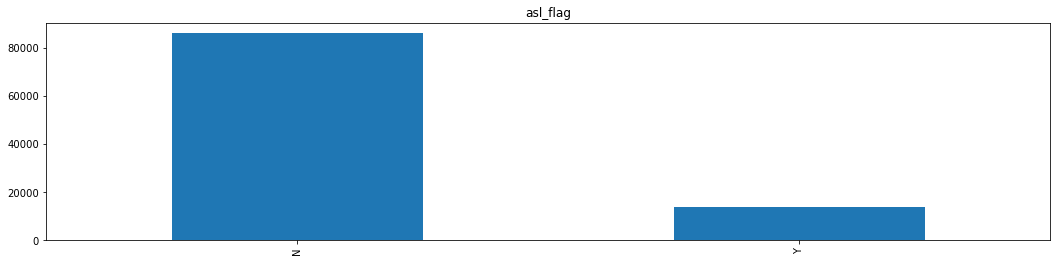

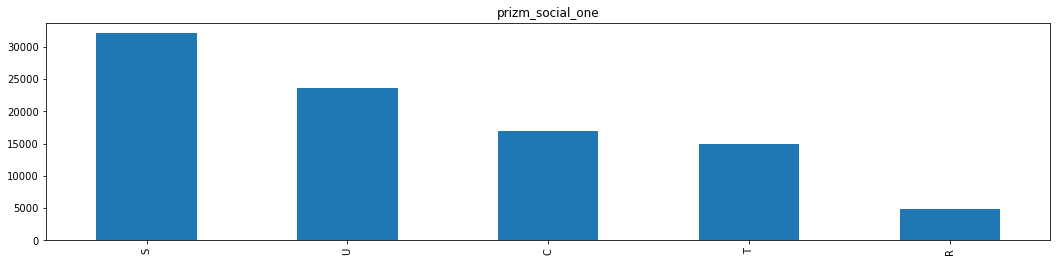

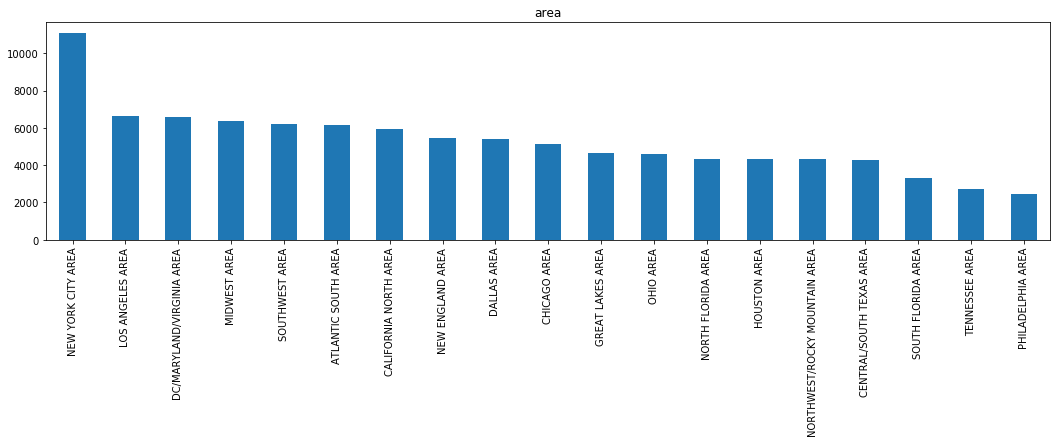

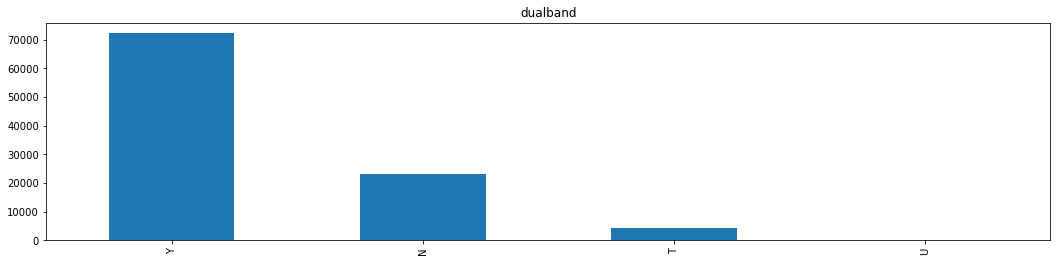

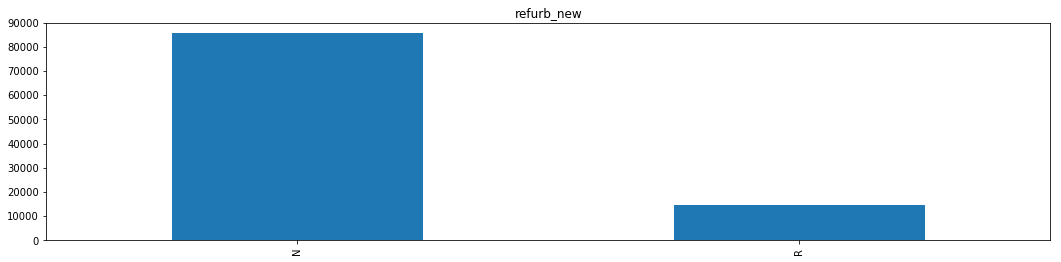

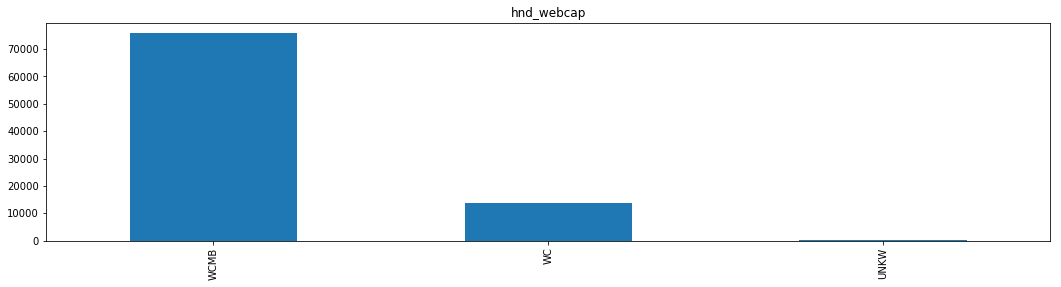

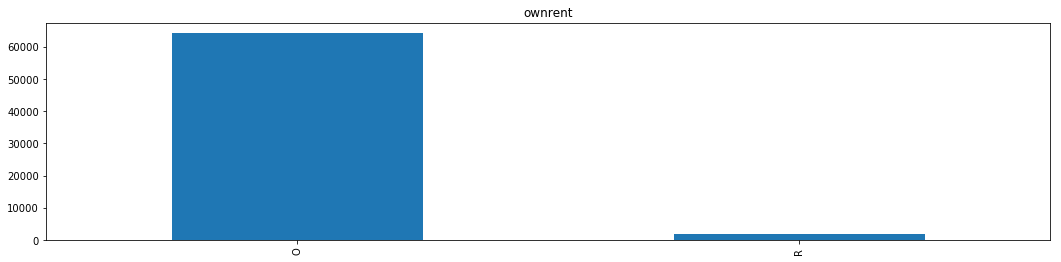

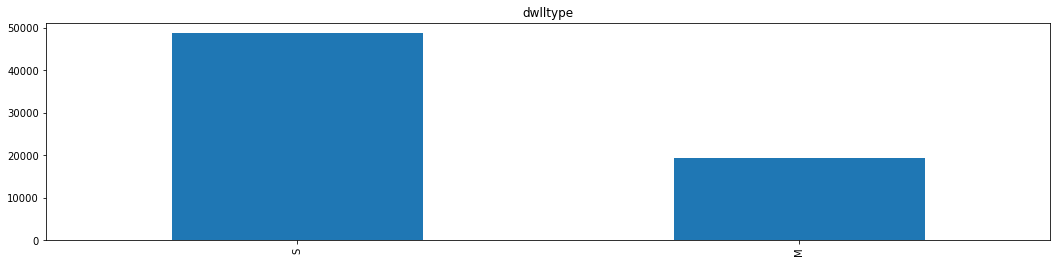

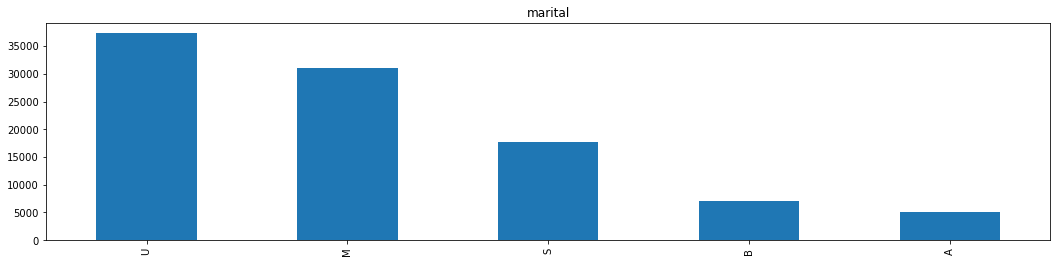

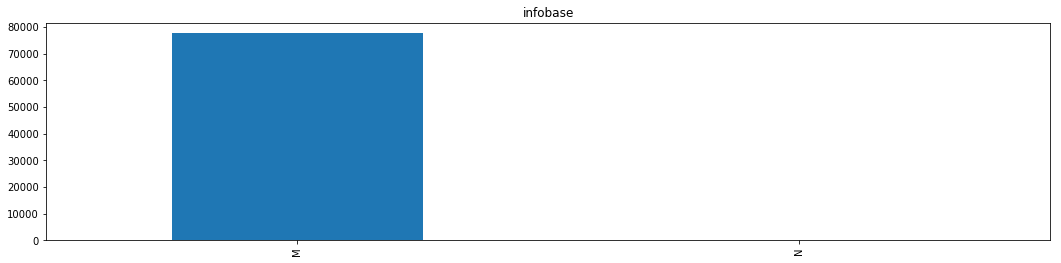

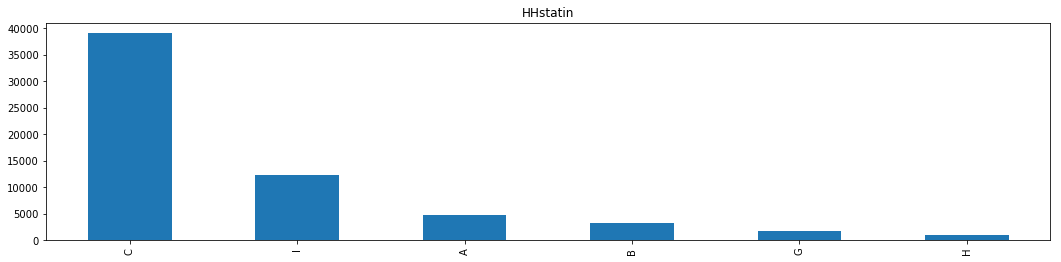

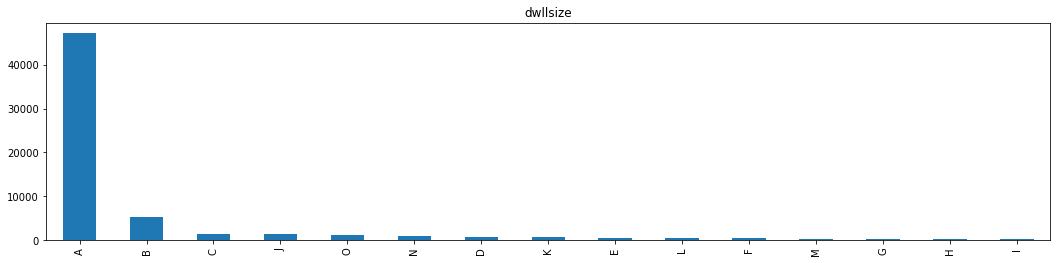

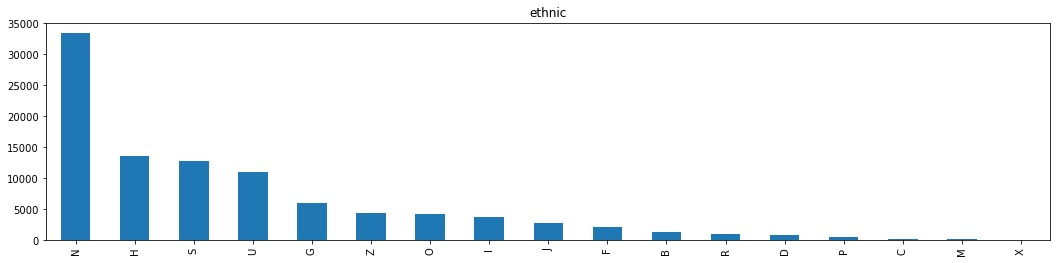

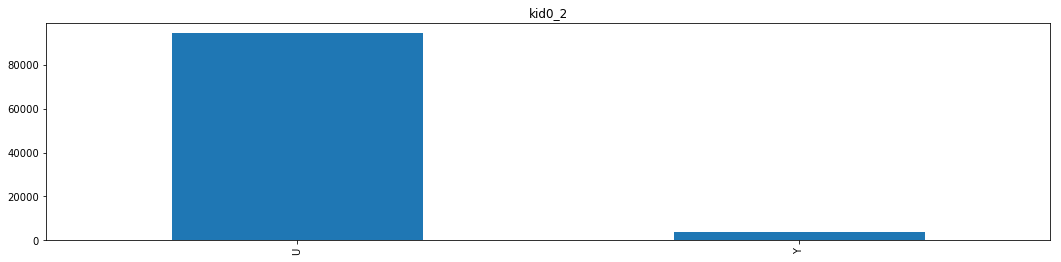

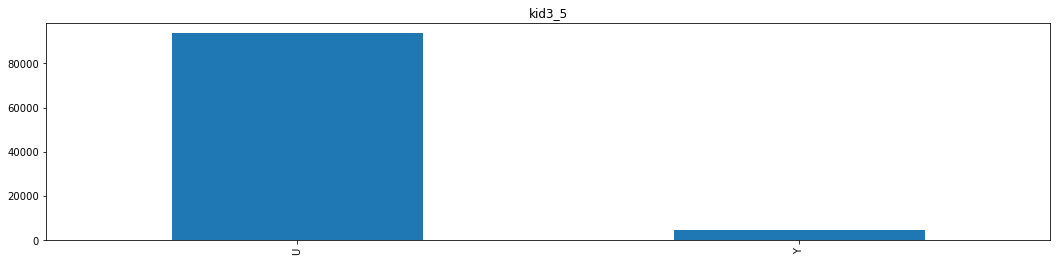

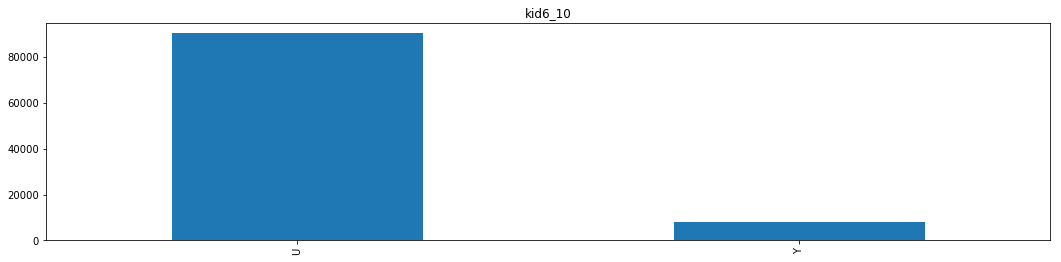

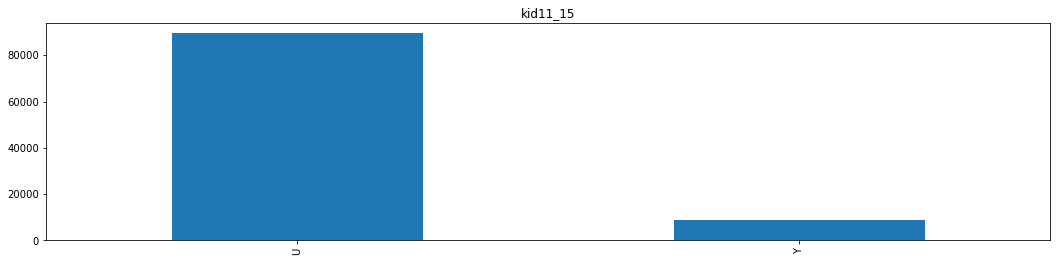

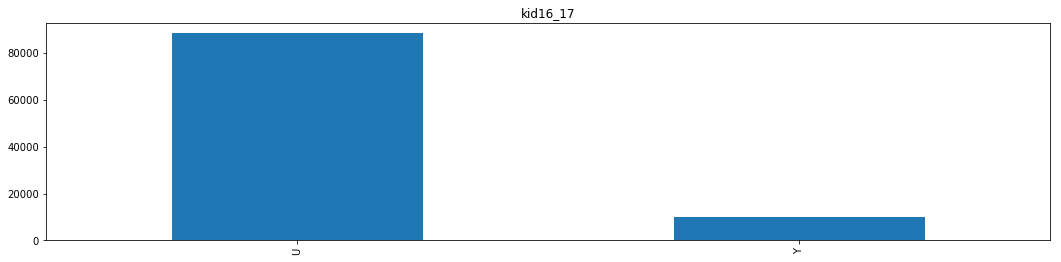

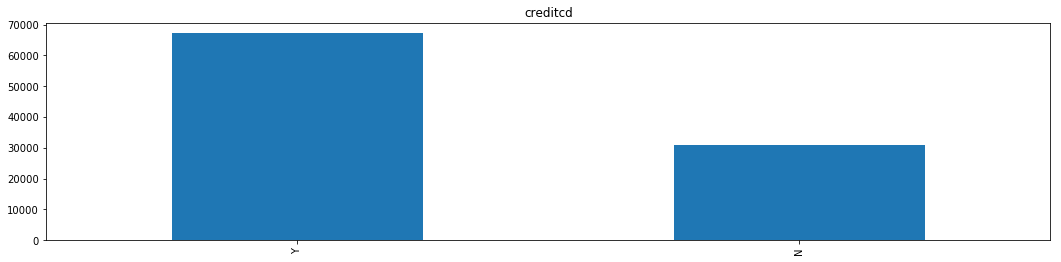

In [7]:
# Frequency plot for Categorical attributes

for i in range(0,21):
    plt.figure(figsize = (18,4))
    ax = df[col_list_obj[i]].value_counts().plot(kind='bar')
    plt.title(col_list_obj[i])
    plt.show()

## Identifying Null Values
Since we have the luxury of having an overwhelming number of attributes we can easily deal with data defects by not focusing them as main contributors to churn. The specific issue we faced had to deal with null values. One attribute, number of cars, had almost 50% null values. It would be irresponsible for us to evaluate an attribute with this severe degree of  missing information on the same degree as complete attrbutes.

In [8]:
# Attributes showing the large number of empty data

with pd.option_context('display.max_rows', 20, 'display.max_columns', 3):
    null = df.isnull().sum()/len(df.index)
    print(null.sort_values(ascending = False))

numbcars         0.49366
dwllsize         0.38308
HHstatin         0.37923
ownrent          0.33706
dwlltype         0.31909
lor              0.30190
income           0.25436
adults           0.23019
infobase         0.22079
hnd_webcap       0.10189
                  ...   
attempt_Mean     0.00000
drop_blk_Mean    0.00000
mou_opkd_Mean    0.00000
mou_opkv_Mean    0.00000
opk_dat_Mean     0.00000
opk_vce_Mean     0.00000
mou_pead_Mean    0.00000
mou_peav_Mean    0.00000
peak_dat_Mean    0.00000
months           0.00000
dtype: float64


Many values do not contain any null values, which confirm the potential utility of this dataset in establishing causal inferences in an analysis focusing on churn indicators. However below is a sample where we checked the percentage of null values and received exceedingly high results. It appears that a majority of null values occur in demographic data, where consumers would need to self-identify their attributes, explaining the lack of data overall in these records. Although all the attributes listed below will not be removed, the percentages below help us narrow down which demographic values should be excluded.

In [9]:
# Removing NaN value from the whole dataset result more than 46,000 recordings available
# This amount of recodrdings should be good enough amount to select important variables.

# Dummy transformation
df_dummy = pd.get_dummies(df)

# Dropping 'Customer_ID' since it 
# df_dummy = dummies.drop('Customer_ID', axis = 1)
df_dummy_NaN = df_dummy.dropna()
print('df_dummy_NaN.shape =', df_dummy_NaN.shape)
print('df_dummy_NaN.columns = ', df_dummy_NaN.columns)

df_dummy_NaN.shape = (46697, 232)
df_dummy_NaN.columns =  Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       ...
       'kid3_5_U', 'kid3_5_Y', 'kid6_10_U', 'kid6_10_Y', 'kid11_15_U',
       'kid11_15_Y', 'kid16_17_U', 'kid16_17_Y', 'creditcd_N', 'creditcd_Y'],
      dtype='object', length=232)


In [10]:
# Data Prep: Normalization and Shifting to make Non-negative values

# sample values for Dimension Reduction Tests (5,000 recordings)
np.random.seed(0)
df_sample = df_dummy_NaN.sample(n = 5000, random_state = 12, axis = 0)

from sklearn import preprocessing
df_dummy_NaN_X = preprocessing.scale(df_sample.ix[:, df_sample.columns != 'churn']) + 25
col_x_list = list(df_sample.ix[:, df_sample.columns != 'churn'])
print(df_dummy_NaN_X.mean(axis = 0))
print(df_dummy_NaN_X.std(axis = 0))

[ 25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  

## Dimension Reduction (D.R.)

Source: https://machinelearningmastery.com/feature-selection-machine-learning-python 

## <center> D.R.Method 1: Univariate Chi-Square Test
<center> Run a univariate test and find the rank of attributes. Chi-square test is used since this test is for classification not regression.</center>  

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing

# Fit-Test

X = df_dummy_NaN_X
Y = df_sample.churn

# feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)

# Sort Attributes with fit.scores
Chi2Test = pd.DataFrame({'Attribute': col_x_list, 'FitScore': fit.scores_, 'P-value': fit.pvalues_})

with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    print(Chi2Test.sort_values(by = 'FitScore', axis = 0, ascending = False))

           Attribute  FitScore   P-value
76           eqpdays  3.377673  0.066085
169  hnd_webcap_WCMB  3.049046  0.080785
66         hnd_price  2.997222  0.083407
2        totmrc_Mean  1.929762  0.164784
1           mou_Mean  1.304438  0.253404
28     mou_cvce_Mean  1.214996  0.270345
60           avg3mou  1.147576  0.284057
37     mou_peav_Mean  0.997313  0.317962
168    hnd_webcap_WC  0.996168  0.318239
41     mou_opkv_Mean  0.912018  0.339580
30     mou_rvce_Mean  0.791363  0.373688
77       Customer_ID  0.765958  0.381471
63           avg6mou  0.734698  0.391365
136       asl_flag_Y  0.710219  0.399371
135       asl_flag_N  0.710219  0.399371
..               ...       ...       ...
103      crclscod_EC  0.000000  1.000000
179       infobase_M  0.000000  1.000000
111      crclscod_IF  0.000000  1.000000
112       crclscod_J  0.000000  1.000000
118      crclscod_P1  0.000000  1.000000
167  hnd_webcap_UNKW  0.000000  1.000000
119       crclscod_S  0.000000  1.000000
120      crclsco

## <center>D.R.Method 2: Recursive Feature Elimination</center>

RFE continuously eliminate features by using weights of each features.  The weight of a feature is obtained either by the coefficients of a linear model or through a 'feature__importances_', which is from the Forests of Trees.

In [12]:
# !This cell takes a couple minutes to run.  

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(random_state = 12)
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)

# Sort Attributes with fit.scores
RFETest = pd.DataFrame({'Attribute': col_x_list, 'FitRank': fit.ranking_})
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    print(RFETest.sort_values(by = 'FitRank', axis = 0, ascending = True))

               Attribute  FitRank
1               mou_Mean        1
58                avgmou        2
76               eqpdays        3
86           crclscod_B2        4
24         ccrndmou_Mean        5
25           cc_mou_Mean        6
23         custcare_Mean        7
4            ovrmou_Mean        8
64               avg6qty        9
61               avg3qty       10
60               avg3mou       11
65               avg6rev       12
0               rev_Mean       13
62               avg3rev       14
49              uniqsubs       15
..                   ...      ...
10            change_rev      217
195           dwllsize_I      218
42         mou_opkd_Mean      219
38         mou_pead_Mean      220
162           dualband_T      221
57                avgrev      222
135           asl_flag_N      223
160  area_TENNESSEE AREA      224
26         inonemin_Mean      225
18         plcd_dat_Mean      226
16         unan_dat_Mean      227
13         blck_vce_Mean      228
132          c

## <center>D.R.Method 3: Feature Importance w/ Extra Trees</center>

Feature Importance from the Forests of Trees packages allows to evaluate the importance of the features on an artificial classification task. 

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(random_state  = 12)
model.fit(X, Y)

# Sort Attributes with fit.scores
ETTest = pd.DataFrame({'Attribute': col_x_list, 'Importance': model.feature_importances_})
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    print(ETTest.sort_values(by = 'Importance', axis = 0, ascending = False))

           Attribute  Importance
77       Customer_ID    0.012462
76           eqpdays    0.012208
73            income    0.012181
53            totrev    0.012051
2        totmrc_Mean    0.011999
66         hnd_price    0.011663
31   owylis_vce_Mean    0.011623
48            months    0.011500
54            adjrev    0.011019
55            adjmou    0.010844
72            adults    0.010594
43     drop_blk_Mean    0.010409
10        change_rev    0.010402
71               lor    0.010198
51          totcalls    0.010189
..               ...         ...
119       crclscod_S    0.000000
163       dualband_U    0.000000
97       crclscod_D5    0.000000
118      crclscod_P1    0.000000
117       crclscod_O    0.000000
167  hnd_webcap_UNKW    0.000000
112       crclscod_J    0.000000
111      crclscod_IF    0.000000
108      crclscod_GY    0.000000
105      crclscod_EM    0.000000
179       infobase_M    0.000000
180       infobase_N    0.000000
104      crclscod_EF    0.000000
103      c

## Dimension Reduction Summary

In [14]:
# Add Rank Values for each test

Chi2Test['Chi2_Rank'] = Chi2Test['FitScore'].rank(ascending = 0)
ETTest['ETree_Rank'] = ETTest['Importance'].rank(ascending = 0)
# print( Chi2Test, ETTest)

In [15]:
# The final importance rank is calculated by adding all three test rank together.

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    DR_Summary = pd.DataFrame({'Attribute': Chi2Test.Attribute, 'Chi2_Rank' : Chi2Test.Chi2_Rank, 'RFE_Rank' : RFETest.FitRank, 'ETree_Rank' : ETTest.ETree_Rank})
    DR_Summary['Rank_Sum'] = DR_Summary.sum(axis = 1)
    DR_Summary_sort = DR_Summary.sort_values(by = 'Rank_Sum', axis = 0, ascending = True)
    print(DR_Summary_sort)

                              Attribute  Chi2_Rank  ETree_Rank  RFE_Rank  \
76                              eqpdays        1.0         2.0         3   
66                            hnd_price        3.0         6.0        21   
1                              mou_Mean        5.0        25.0         1   
60                              avg3mou        7.0        22.0        11   
2                           totmrc_Mean        4.0         5.0        33   
37                        mou_peav_Mean        8.0        36.0        22   
64                              avg6qty       40.0        28.0         9   
24                        ccrndmou_Mean       17.0        57.0         5   
28                        mou_cvce_Mean        6.0        39.0        37   
44                         attempt_Mean       26.0        29.0        27   
0                              rev_Mean       54.0        17.0        13   
21                        comp_vce_Mean       19.0        37.0        28   
61          

In [16]:
# Top 25 important attributes are selected based on the three tests.

col_name_top25 = DR_Summary_sort.iloc[0:25,0]
col_name_top25

76             eqpdays
66           hnd_price
1             mou_Mean
60             avg3mou
2          totmrc_Mean
37       mou_peav_Mean
64             avg6qty
24       ccrndmou_Mean
28       mou_cvce_Mean
44        attempt_Mean
0             rev_Mean
21       comp_vce_Mean
61             avg3qty
65             avg6rev
62             avg3rev
58              avgmou
15       unan_vce_Mean
49            uniqsubs
25         cc_mou_Mean
35       peak_vce_Mean
169    hnd_webcap_WCMB
63             avg6mou
23       custcare_Mean
41       mou_opkv_Mean
59              avgqty
Name: Attribute, dtype: object

  # Step 4: Exploring Reduced and <font color=blue>New Features</font>
  Now that we have identfied the top 25 values we can horizontally trim our 100 attributes

In [17]:
# Subsetting the 'churn' and the top 25 features

df_reduced = df_dummy.ix[:, list(col_name_top25)]
df_reduced['churn'] = df_dummy.churn
df_reduced.shape

(100000, 26)

## <font color=blue>New Feature</font>
For our new feature, we wanted to capitalize on the preexisting data that was given to us. We were given the average number of minutes used in month 3 and month 6. By simply subtracting these values from one another we can determine if there is a downward trend in the consumer's usage. A downward trend could easily be interpreted as a precursor to churn, especially so early in the consumer's relationship with the provider.

In [18]:
# New Feature: DeltaMou = 'AVG3MOU' - 'AVG6MOU'
# Expecting this change in the minutes of use from last 6 month to last 3 month can be a good indicatro to churn.

with pd.option_context('display.max_rows', 20, 'display.max_columns', 3):
    df_reduced['DeltaMou'] = df_reduced['avg3mou'] - df_reduced['avg6mou']
    print(df_reduced.DeltaMou)
    print('df_reduced.shape = ',df_reduced.shape)

0        -50.0
1       -172.0
2          1.0
3        -42.0
4        -28.0
5         73.0
6          0.0
7        -86.0
8         58.0
9        -48.0
         ...  
99990     -5.0
99991      6.0
99992    -10.0
99993     97.0
99994    240.0
99995   -193.0
99996    -28.0
99997    -50.0
99998     88.0
99999     -6.0
Name: DeltaMou, dtype: float64
df_reduced.shape =  (100000, 27)


## Reducing null values
Now that we have trimmed the attributes down to those that are most effective, we can reduce the data vertically to only focus on records that do not contain incomplete data. The resulting number of records after transformation is stil 96,000+ which is substantial enough for an analysis

In [19]:
# Delete Empty Data since the remaining recordings are still large enough
# This amount of recordings will provide enough significance for the statistical tests.

df_reduced_NaN = df_reduced.dropna()
print('df_reduced_NaN.shape =', df_reduced_NaN.shape)

df_reduced_NaN.shape = (96042, 27)



# <font color=blue>Simple Statistics</font>


### Box Plot

- Box plot is showing that most of the attributes are right-skewed. Log-transform will help to normally distributed.

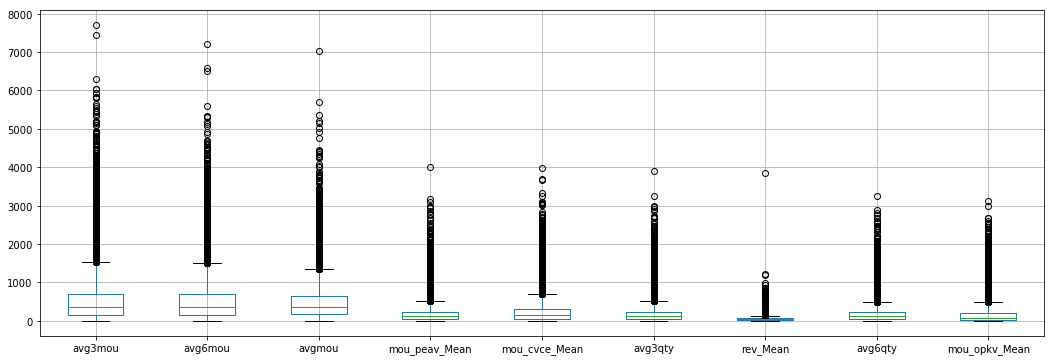

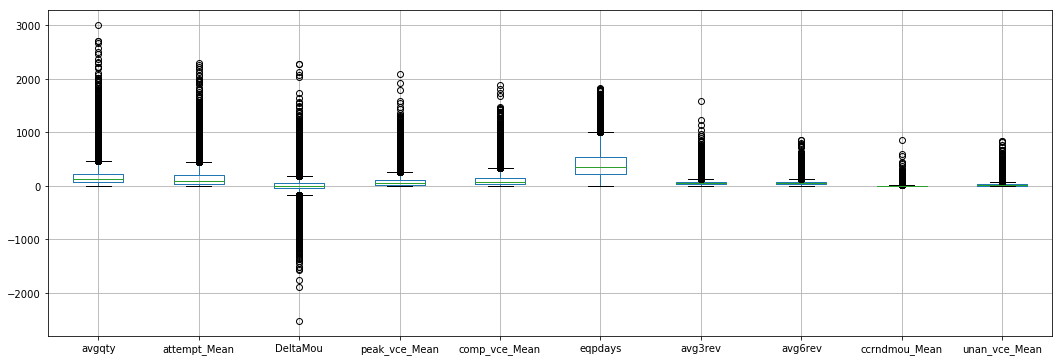

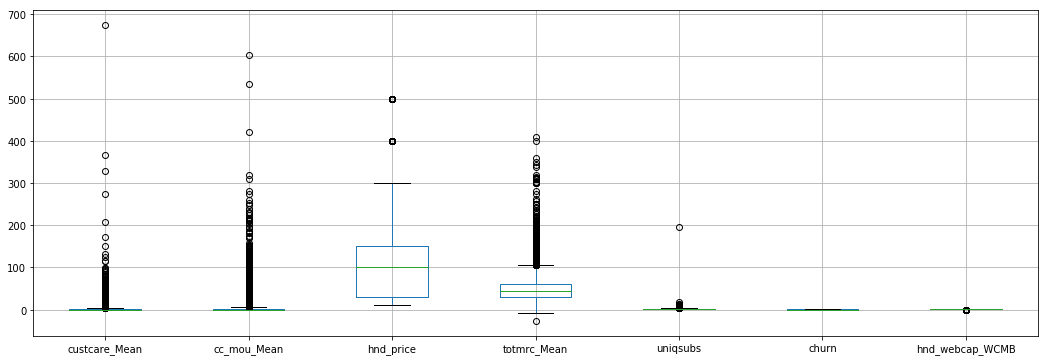

In [20]:
# Box Plot

# Sort atrributes by max value for box plot
df_reduced_sort = df_reduced_NaN.ix[:, df_reduced_NaN.max().sort_values(ascending = False).index]
# col_list_sort = list(df_sort)

# Plot only numerical attributes

plt.figure(figsize = (18,6))
ax = df_reduced_sort[df_reduced_sort.columns[1:10]].boxplot()
plt.show()

plt.figure(figsize = (18,6))
ax = df_reduced_sort[df_reduced_sort.columns[10:20]].boxplot()
plt.show()

plt.figure(figsize = (18,6))
ax = df_reduced_sort[df_reduced_sort.columns[20:30]].boxplot()
plt.show()

### Basic Stats for Numerical Attributes
Average time a consumer is with a provider is a little over a year. The data is split pretty evenly between customeres who churned or not. 

In [21]:
# Basic stats of the first 20 attributes
# ! describe function only shows 20 outputs at a time

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_reduced_NaN.describe())

            eqpdays     hnd_price      mou_Mean       avg3mou   totmrc_Mean  \
count  96042.000000  96042.000000  96042.000000  96042.000000  96042.000000   
mean     398.982383    101.292962    509.076306    515.161731     46.067790   
std      255.119400     61.077989    522.016824    530.398149     23.528958   
min       -5.000000      9.989998      0.000000      0.000000    -26.915000   
25%      224.000000     29.989990    148.750000    149.250000     30.000000   
50%      350.000000     99.989990    352.000000    354.000000     44.990000   
75%      538.000000    149.989990    695.000000    704.000000     59.990000   
max     1823.000000    499.989990  12206.750000   7716.000000    409.990000   

       mou_peav_Mean       avg6qty  ccrndmou_Mean  mou_cvce_Mean  \
count   96042.000000  96042.000000   96042.000000   96042.000000   
mean      173.482039    177.887310       4.560935     225.824813   
std       207.154396    181.841956      12.594578     262.916733   
min         0.00


# <font color=blue>Visualize Attributes</font>

> #### Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [22]:
# data frame with only string data
df_obj = df.loc[:, df.dtypes == object]
col_list_obj = list(df_obj)
print(col_list_obj)

['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


In [23]:
# Number of Object Columns
len(col_list_obj)

21

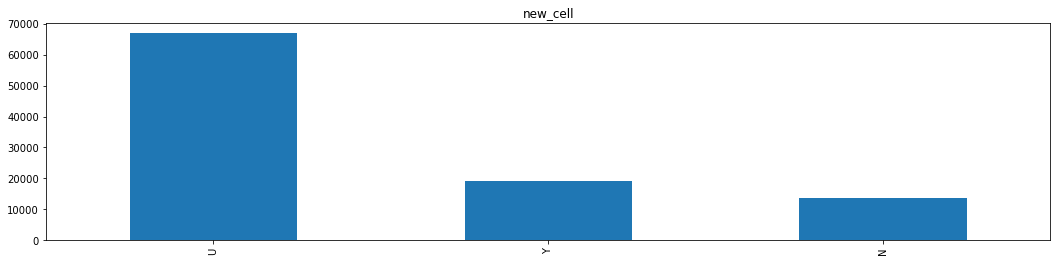

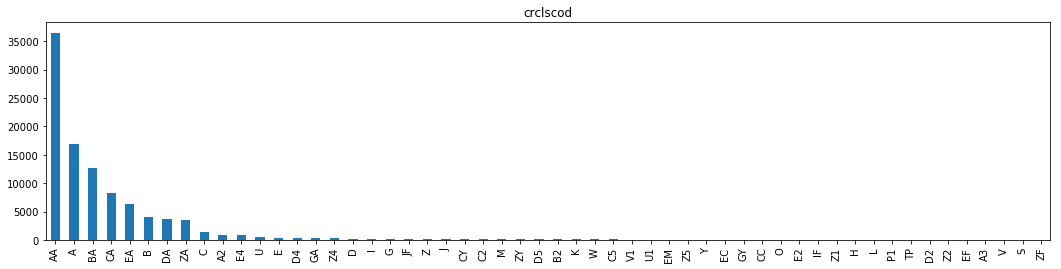

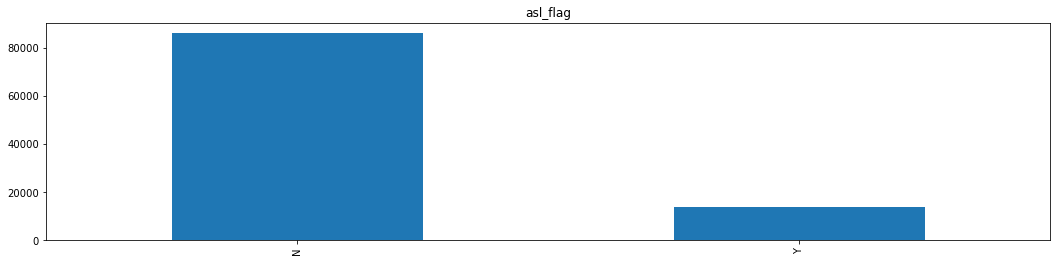

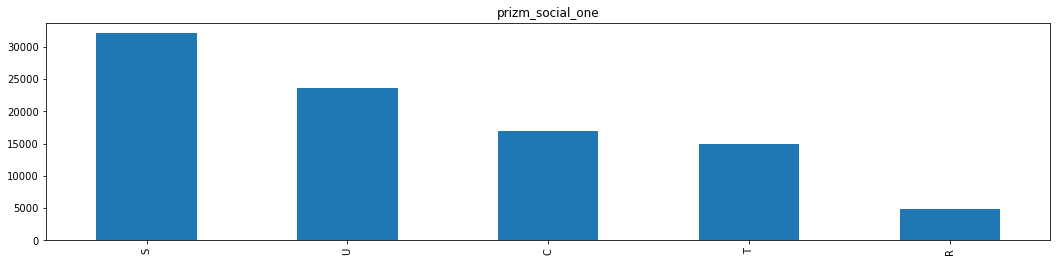

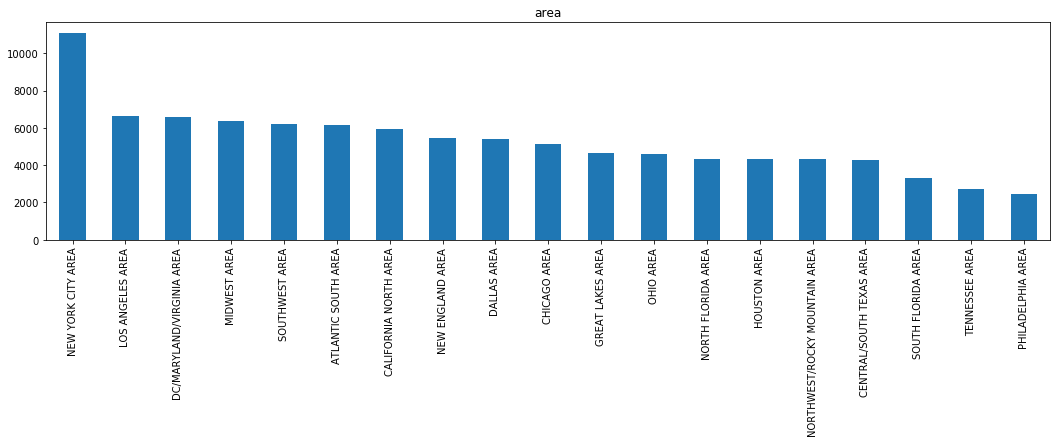

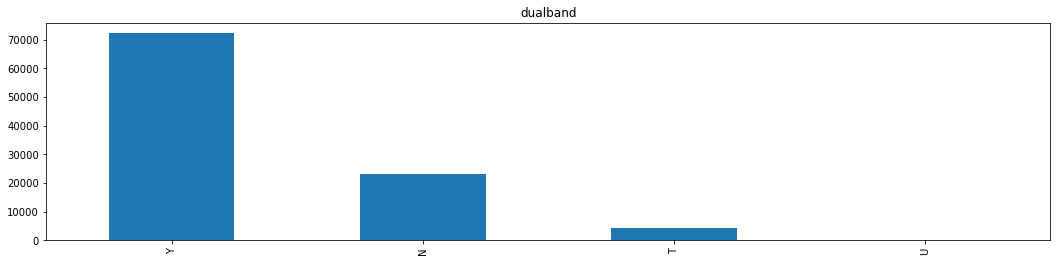

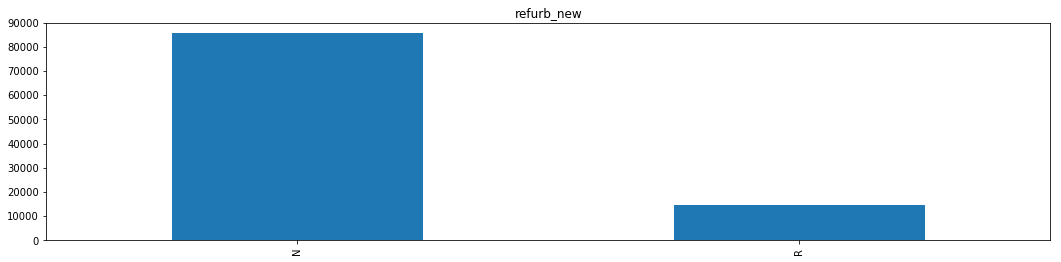

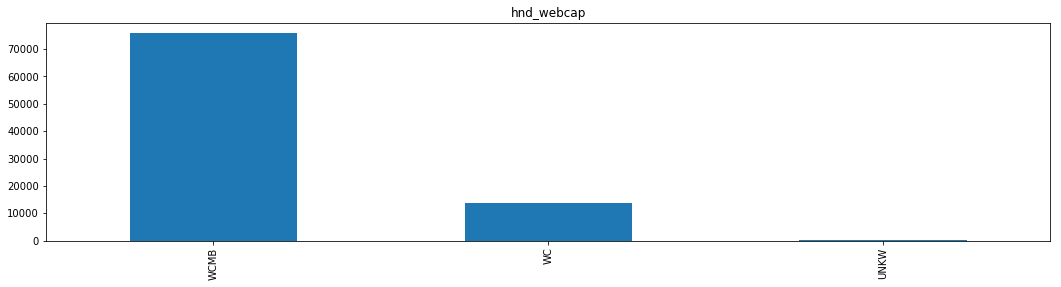

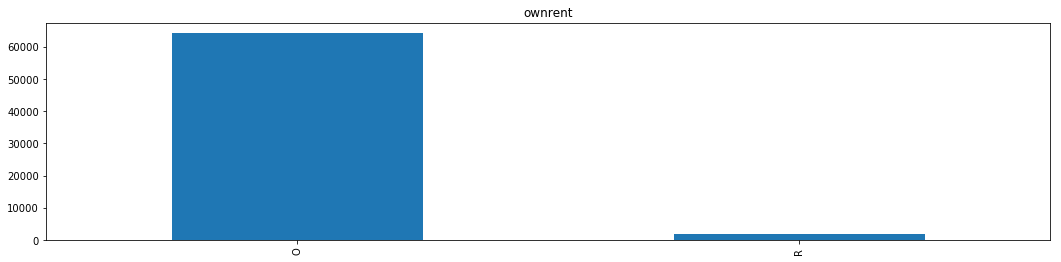

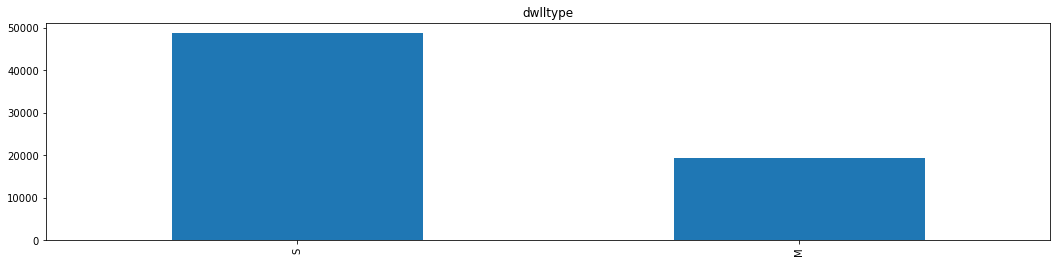

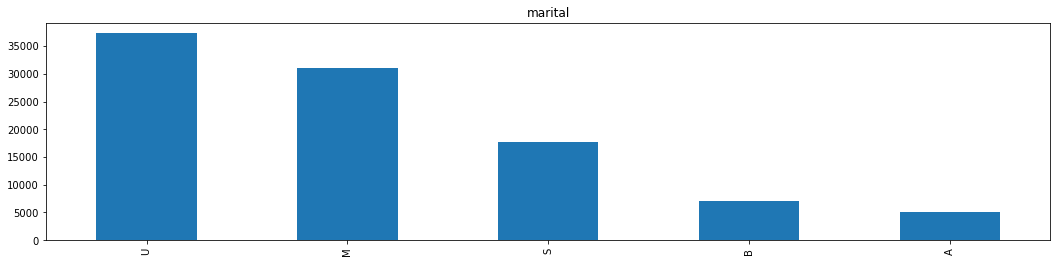

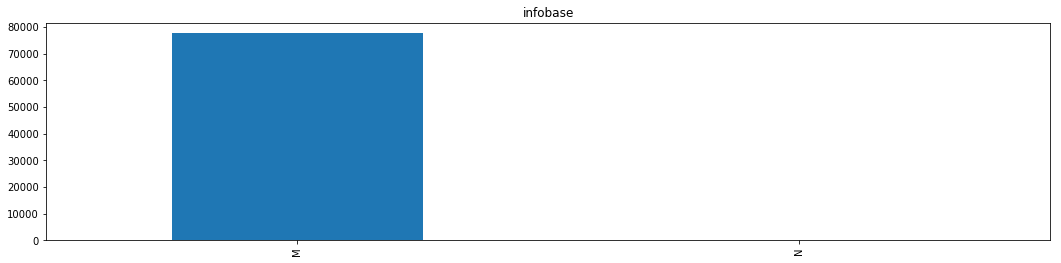

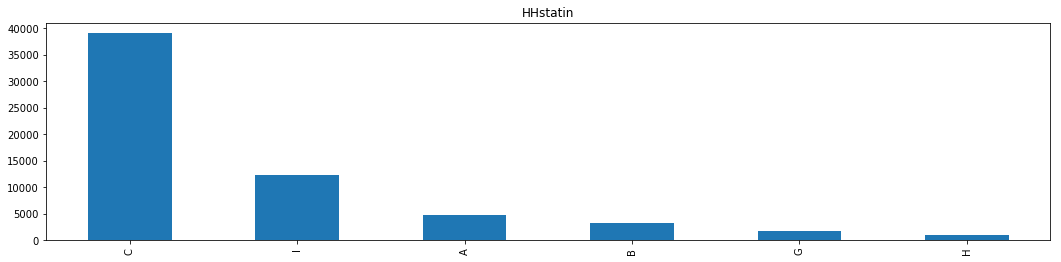

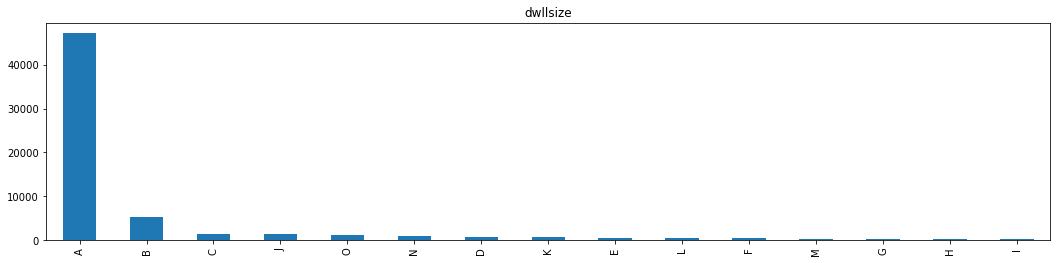

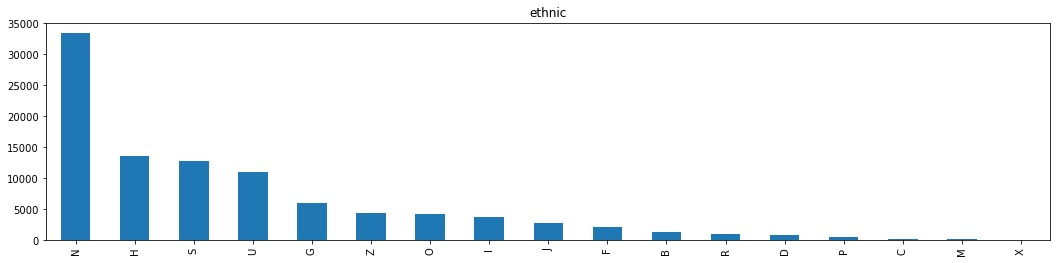

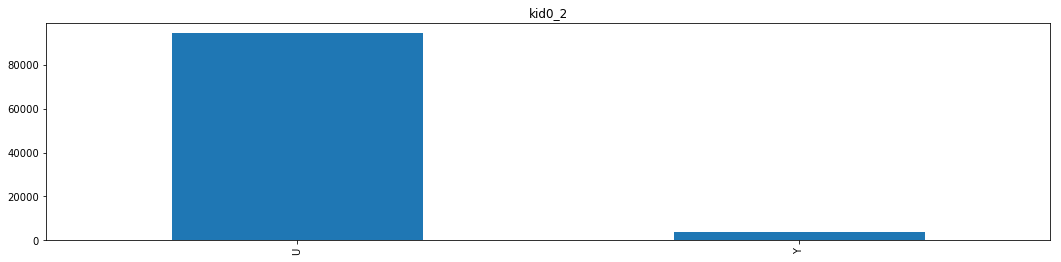

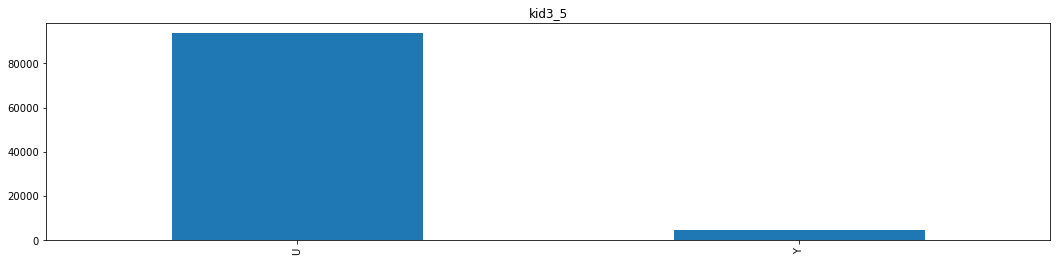

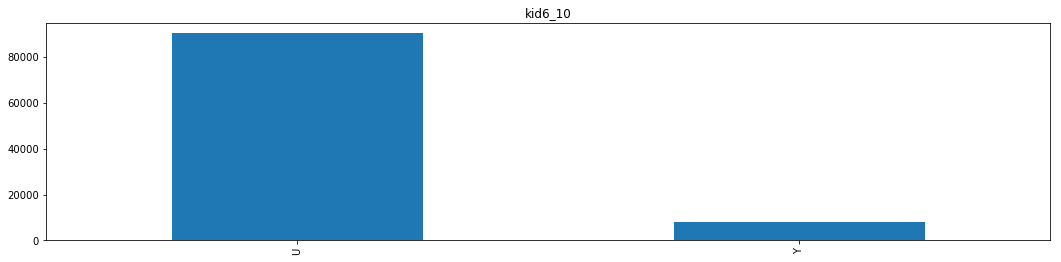

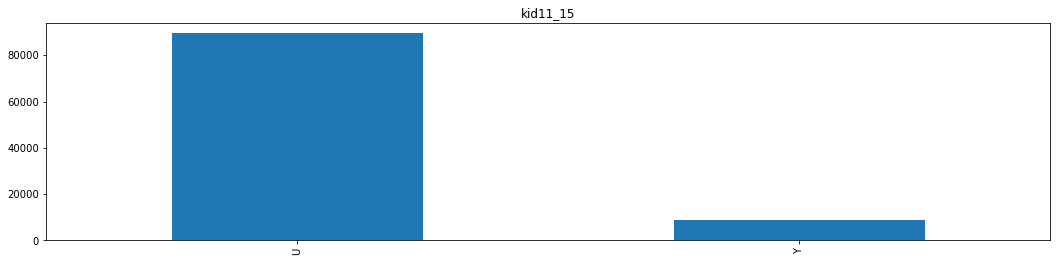

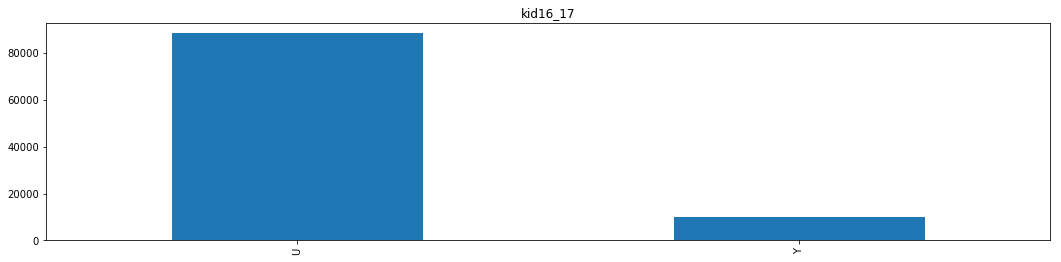

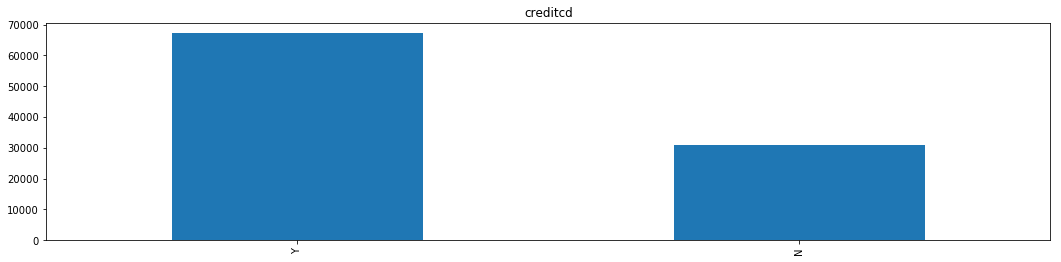

In [24]:
# Frequency plot for Categorical attributes
# ! need to chage this plot format into a bar graph/ histogram style.

for i in range(0,21):
    plt.figure(figsize = (18,4))
    ax = df[col_list_obj[i]].value_counts().plot(kind='bar')
    plt.title(col_list_obj[i])
    plt.show()




# <font color=blue> Explore Joint Attributes</font>

### Group By 'Churn', Mean Values

- The average age('eqpdays') of a phone is younger for those who not churn.
- Those who do not churn showing more time in useage (minutes of use)
- The average handset price(hnd_price) is higher for those who did not churn.  

In [25]:
# Mean by group
df_churn_mean = df.groupby(['churn']).mean()
print(df_churn_mean)
df_std = df.std()
# print(df_std)

        rev_Mean    mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  ovrrev_Mean  \
churn                                                                           
0      59.218692  543.206895    47.782378  0.918039    39.172904    12.842879   
1      58.211074  483.306417    44.543091  0.859019    43.010449    14.290904   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou      ...       \
churn                                                       ...        
0        12.573835     0.265309   1.150619   -5.344265      ...        
1        14.031045     0.257244   1.424969  -22.759003      ...        

         models     truck        rv       lor    adults    income  numbcars  \
churn                                                                         
0      1.585959  0.190411  0.082447  6.383884  2.541654  5.771879  1.566100   
1      1.504984  0.187204  0.082716  5.960302  2.518496  5.794841  1.569092   

       forgntvl     eqpdays   Customer_ID  
churn                    

### Correlation Coefficient Heat Map

- Heat map tells if multicollinearity exist or not.
- Based on the result of heat map and index of corr.coef higher than 0.9, multiple predictors are involved in the multicollinearity.

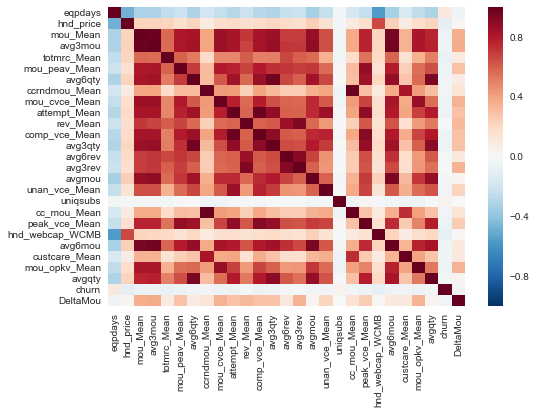

In [26]:
import seaborn as sb  # !seaborn gives issue with boxplot so it need to be imported after the boxplot.

# Heatmap for the above correlation coefficients
corr = df_reduced_NaN.corr()
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [27]:
# Idendifying highly correlated attributes

HighCorr = corr > .9


result = pd.melt(HighCorr.reset_index(), id_vars=['index'])
mask = result['value'] == True
result = result.loc[mask, ['index', 'variable']]
result.columns = [0, 1]
# print(result)

HighCorr_var = result.ix[result.ix[:,0] != result.ix[:,1] ,:]
print(HighCorr_var)
HighCorr_varList = HighCorr_var.ix[:,0]
HighCorr_varList = HighCorr_varList.drop_duplicates()
# print(HighCorr_varList)

                 0              1
57         avg3mou       mou_Mean
75         avg6mou       mou_Mean
83        mou_Mean        avg3mou
102        avg6mou        avg3mou
174        avg3qty        avg6qty
186         avgqty        avg6qty
207    cc_mou_Mean  ccrndmou_Mean
254  comp_vce_Mean   attempt_Mean
284        avg3rev       rev_Mean
306   attempt_Mean  comp_vce_Mean
316  peak_vce_Mean  comp_vce_Mean
330        avg6qty        avg3qty
365        avg3rev        avg6rev
388       rev_Mean        avg3rev
391        avg6rev        avg3rev
426        avg6mou         avgmou
493  ccrndmou_Mean    cc_mou_Mean
524  comp_vce_Mean  peak_vce_Mean
569       mou_Mean        avg6mou
570        avg3mou        avg6mou
582         avgmou        avg6mou
654        avg6qty         avgqty



# <font color=blue>Explore Attributes and Class</font>

### Potentials of Predictors to predict 'Churn'

- The eigenvalues of correlation tells the half of the predictors will be a noise or having a severe milticollinearity.

- Linear Regression R-squared value tells how much output can be explained by the predictors. 
  The R-squred value of 0.015 is giving us a heads up from the difficulties of predicting the 'churn' value.
  Predictor values can be transformed and/or the regression algorithms can be more complex to increase the R-squared value. 
  
- Logistic regression accuracy can tell the usefulness of the predictor.  57% of accuracy is a very poor performance. This part of the code is removed since it is out of scope of this part.


In [28]:
# Eigenvalues of Correaltion Matrix
# The largest eigenvalue have more importance.
# The value near zero is insignificant. 

corr = np.corrcoef(df_reduced_NaN.ix[:,df_reduced_NaN.columns != 'churn'], rowvar = 0)
w, v = np.linalg.eig(corr)
print( w.astype(float))

[  1.393e+01   2.373e+00   1.965e+00   1.419e+00   1.231e+00   1.011e+00
   8.841e-01   5.538e-01   5.153e-01   4.509e-01   3.999e-01   3.207e-01
   2.860e-01   1.865e-01   1.273e-01   1.180e-01   7.046e-02   4.851e-02
   4.382e-02   2.792e-02   1.551e-02   9.720e-03   5.449e-03   4.404e-03
   1.293e-03  -1.697e-17]


In [29]:
# Least Squeares Regression Fit Check

import statsmodels.api as sm

X = preprocessing.scale(df_reduced_NaN.ix[:,df_reduced_NaN.columns != 'churn'])
y = df_reduced_NaN.ix[:,df_reduced_NaN.columns == 'churn']
col_X_list = list(df_reduced_NaN.ix[:,df_reduced_NaN.columns != 'churn'])

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     58.51
Date:                Sun, 17 Sep 2017   Prob (F-statistic):          3.25e-291
Time:                        21:42:30   Log-Likelihood:            -1.0217e+05
No. Observations:               96042   AIC:                         2.044e+05
Df Residuals:                   96017   BIC:                         2.046e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0368      0.003     12.697      0.000         0.031     0.042
x2            -0.0281      0.003     -9.119      0.000        -0.034    -0.022
x3            -0.1894      0.017    -11.120      0.000        -0.223    -0.156
x4             0.0322      0.011      2.986      0.003         0.011     0.053
x5            -0.0368      0.003    -11.367      0.000        -0.043    -0.030
x6             0.0051      0.009      0.582      0.561        -0.012     0.022
x7             0.0571      0.023      2.495      0.013         0.012     0.102
x8            -0.2573      0.048     -5.392      0.000        -0.351    -0.164
x9            -0.0147      0.009     -1.604      0.109        -0.033     0.003
x10            0.0981      0.026      3.791      0.000         0.047     0.149
x11            0.0915      0.008     10.877      0.000         0.075     0.108
x12           -0.0670      0.023     -2.970      0.003        -0.111    -0.023
x13           -0.0255      0.020     -1.296      0.195        -0.064     0.013
x14           -0.0045      0.008     -0.596      0.551        -0.019     0.010
x15           -0.0369      0.010     -3.627      0.000        -0.057    -0.017
x16            0.1210      0.013      9.535      0.000         0.096     0.146
x17           -0.0172      0.007     -2.392      0.017        -0.031    -0.003
x18            0.0189      0.002      8.299      0.000         0.014     0.023
x19            0.2105      0.040      5.281      0.000         0.132     0.289
x20           -0.0189      0.010     -1.882      0.060        -0.039     0.001
x21           -0.0052      0.003     -1.588      0.112        -0.012     0.001
x22            0.0267      0.011      2.338      0.019         0.004     0.049
x23            0.0477      0.011      4.523      0.000         0.027     0.068
x24            0.0094      0.007      1.378      0.168        -0.004     0.023
x25           -0.0342      0.013     -2.566      0.010        -0.060    -0.008
x26            0.0266      0.006      4.668      0.000         0.015     0.038
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.999   Jarque-Bera (JB):            13931.521
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       1.134   Cond. No.                     2.25e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.64e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

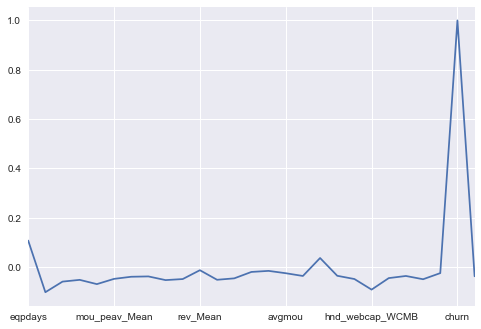

In [30]:
# Correlation Coefficient w/ 'Churn'
# Unfortunately there is no attribute that is strongly correlated with 'Churn' except by itself.

corr = df_reduced_NaN.corr()
corr.churn.plot()
plt.show()

### Scatter Plot

- Scatter plot for the highly correlated attributes clearly shows the relations.
- Unfortunately there was no significant distinguish between churn groups. 

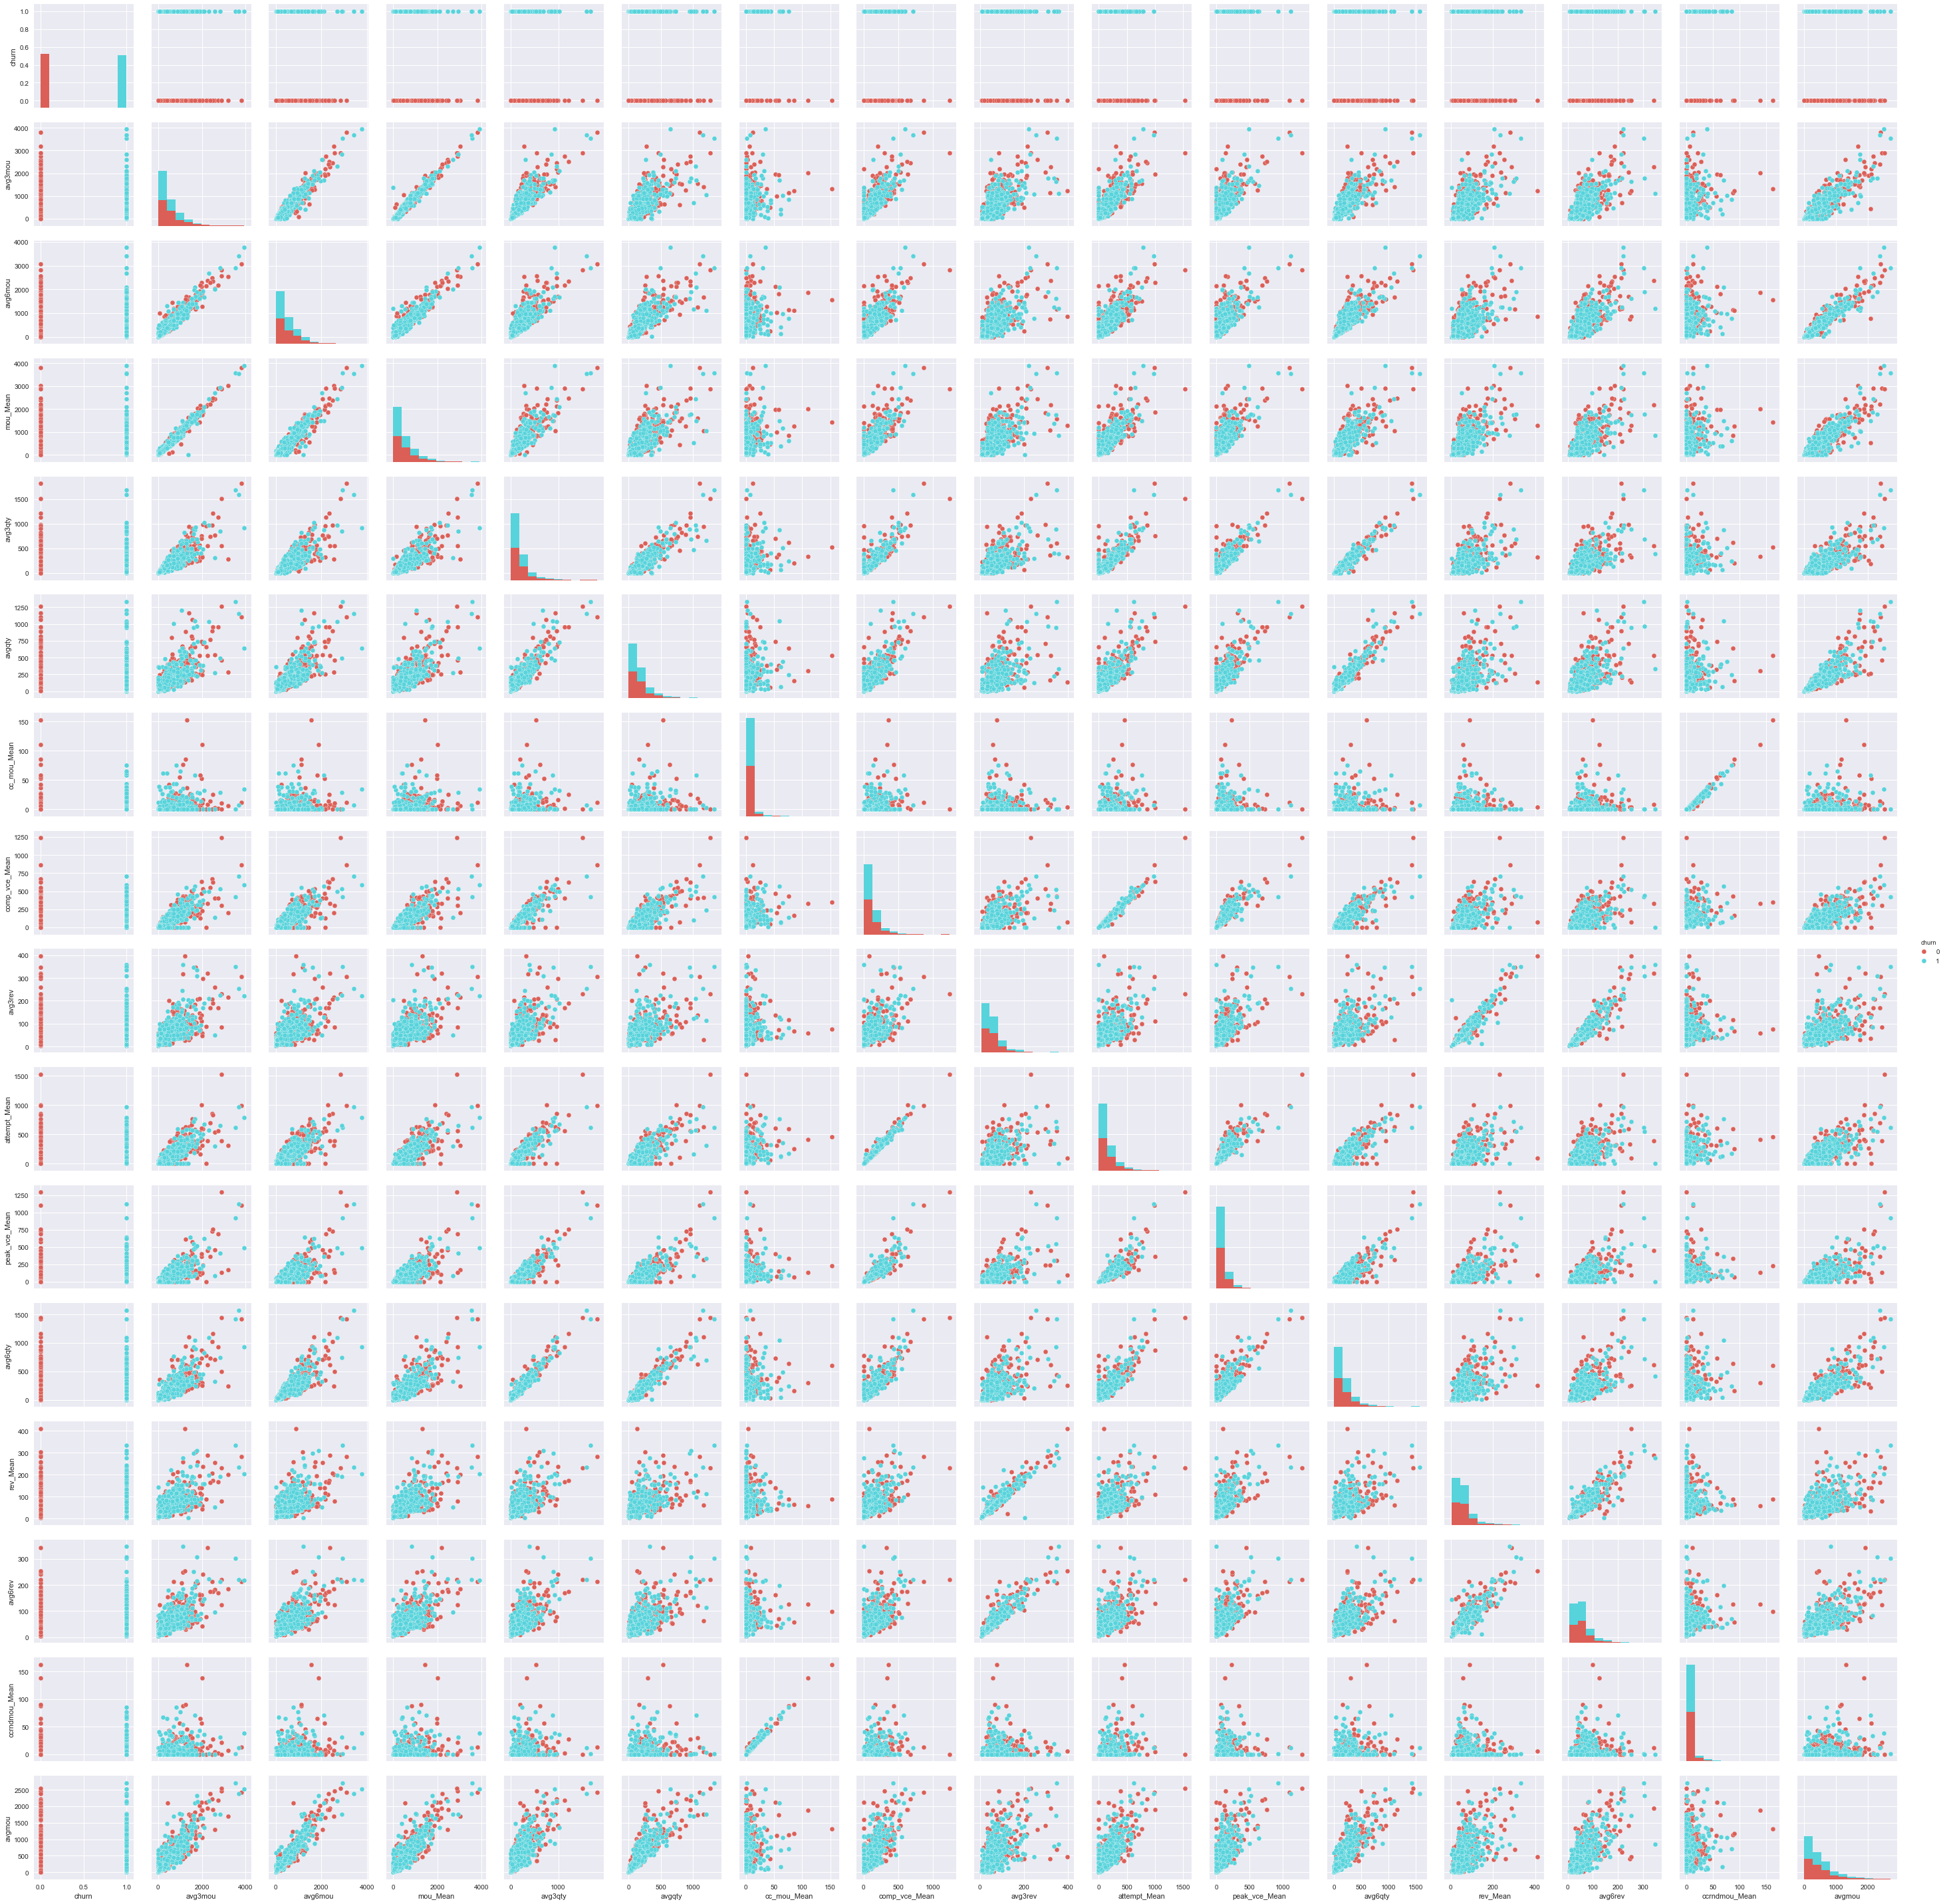

In [31]:
# Scatter Matrix (Part 1: Highly Correlated Attributes)

import seaborn as sb  # !seaborn gives issue with boxplot so it need to be imported after the boxplot.

# sample values for scatter plot (1,000 recordings)
df_reduced_NaN_sample = df_reduced_NaN.sample(n = 1000, random_state = 12, axis = 0)

col = list( HighCorr_varList)  # Select Attributes for the Scatter Matrix; Eliminated 
col2 = ['churn'] + col

sb.pairplot(df_reduced_NaN_sample[col2], hue = 'churn', palette = 'hls')
plt.show()

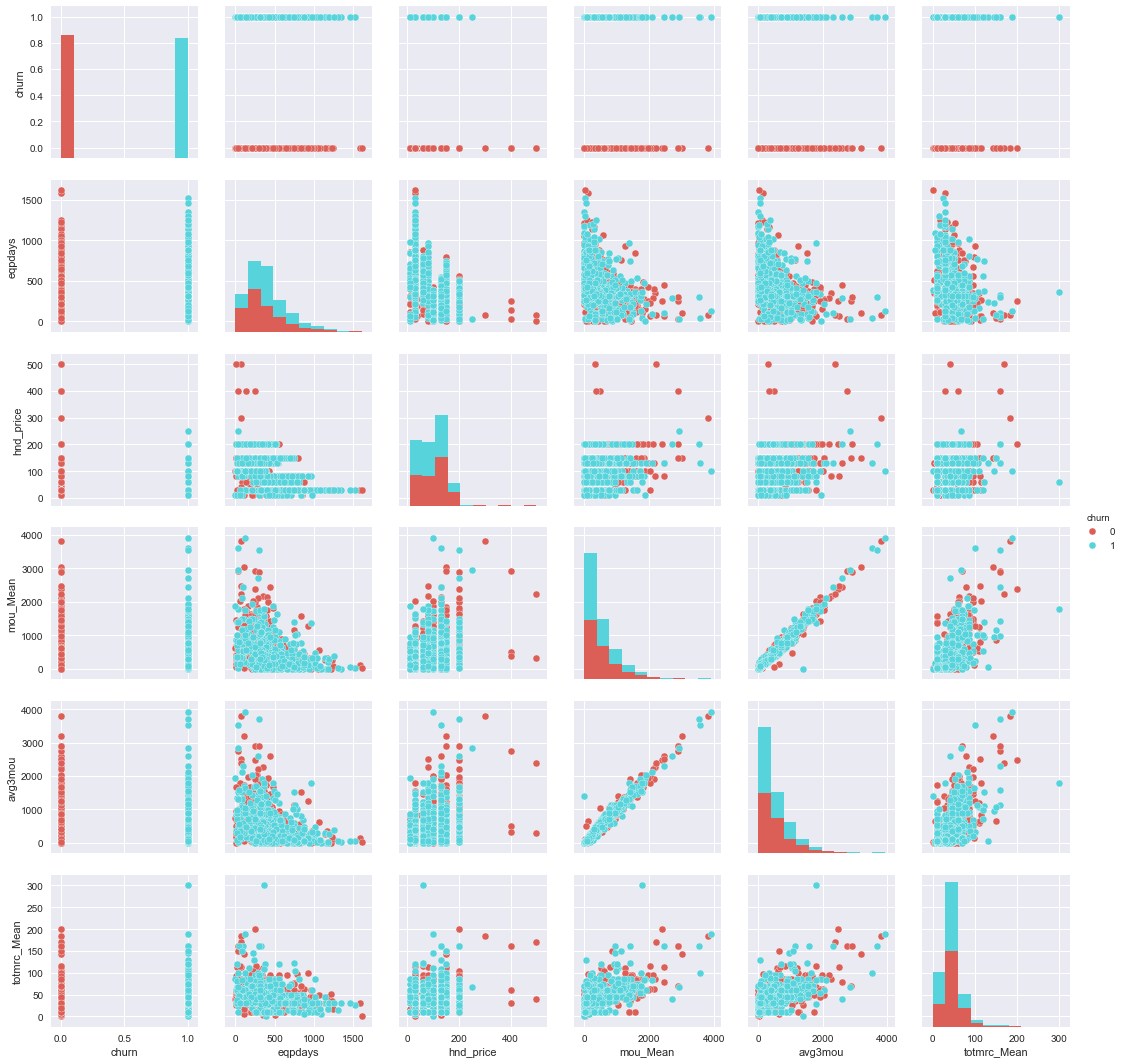

In [32]:
# Scatter Matrix (Part 2: the most important 5 attributes)

col = col_name_top25[0:5]
col2 = ['churn'] + list(col)

sb.pairplot(df_reduced_NaN_sample[col2], hue = 'churn', palette = 'hls')
plt.show()

### Categorical Attributes

- The only categorical variable that was ranked high in importance was handset-web-capability (hnd_webap).
  There is some noticible difference in the frequency.

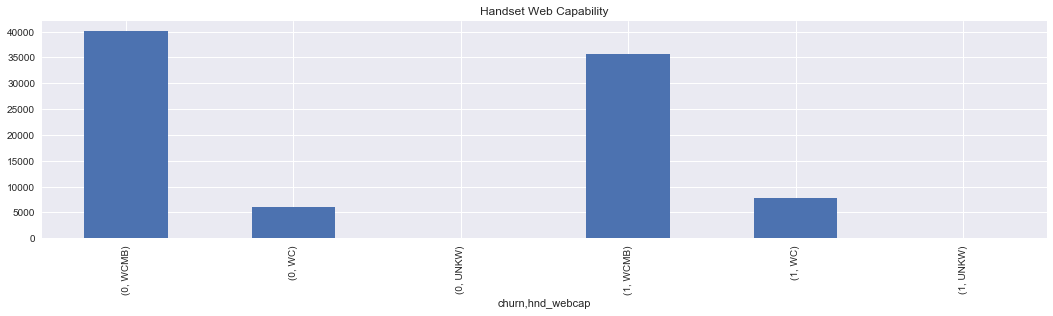

In [33]:
# Data Frame Groupby 'Churn'
df_churn = df.groupby(['churn'])

# Histogram by 'Churn' group for Categorical Attributes

plt.figure(figsize = (18,4))
ax = df_churn.hnd_webcap.value_counts().plot(kind='bar')
plt.title('Handset Web Capability')
plt.show()


# <font color=blue> Conclusion</font>

For this data exploration analysis, it was determined that the original dataset had to be pared down to estimate a churn value. The original dataset was reduced down to 25 attributes from the original 100 attributes through a combination of dimension reduction and ranking. It was found that the R-squared values of regression analysis and the eigen values of correlation coefficient were very low.  Also, many of the resulting attributes showed a high degree of multicollinearity as they were related to the minutes of use (MOU) variable.  Thus, it was concluded that classifying the “churn” value would be difficult with the original predictors without significant modification or transformation.